In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime, date
from glob import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# name of file w/ topic counts 
# swap this one out w/ aby new feature list
count_file = "race-pmi.csv"

In [3]:
# load csv into pandas dataframe

df = pd.read_csv(count_file)
    
# csv has header row in format "feature" then each topic number 0-99
# then rows in format feature, t00-proportion, t02-proportion etc.
# each row totals the number of articles in that slice
# each column totals the proportion of that topic in corpus   

In [4]:
# assign 
df_by_feature = df.set_index('Feature') # need to change this if col not labeled "Feature"

In [5]:
# look at topics that have high PMI with Child as feature. This is defined as:

# PMI(topic, child-slice) = log P (topic, child-slice) - log P (topic) - log P (child-slice)
# variant of : https://github.com/jacobeisenstein/gt-css-class/blob/master/labs/lab6/Lab%206%20-%20Text%20over%20time.ipynb

# PMI functions 

# this computues $p(i)$ where $i$ is a topic
def get_p_topic(df_by_feature): 
    df_tot = np.array(df_by_feature.sum(axis=0))
    return df_tot / df_by_feature.values.sum()

print(df_by_feature.values.sum())

281898.00002870004


In [6]:
P_base = get_p_topic(df_by_feature)

Text(0,0.5,'proportion')

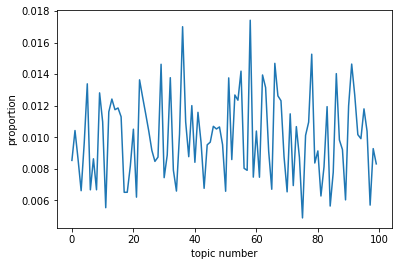

In [7]:
plt.plot(P_base)
plt.xlabel('topic number')
plt.ylabel('proportion')

In [8]:
P_base

array([0.00853405, 0.01042736, 0.00860379, 0.00661385, 0.0096269 ,
       0.01338707, 0.00666897, 0.00863606, 0.00667204, 0.01281423,
       0.01097559, 0.00553671, 0.01161046, 0.01242216, 0.01174842,
       0.01185597, 0.01129976, 0.00651179, 0.00651513, 0.00818154,
       0.01051164, 0.00620489, 0.01363947, 0.01253963, 0.01148127,
       0.01038742, 0.00916887, 0.00847174, 0.00874393, 0.01462595,
       0.00744075, 0.00886904, 0.0137762 , 0.00791884, 0.00659088,
       0.01019792, 0.01700649, 0.01097454, 0.00876938, 0.01200568,
       0.00841427, 0.01158029, 0.00968531, 0.0067649 , 0.00951998,
       0.00969307, 0.01069443, 0.0105252 , 0.0106546 , 0.00953503,
       0.00657825, 0.01376278, 0.0085873 , 0.01267928, 0.01234918,
       0.01418974, 0.00803279, 0.00790505, 0.01741612, 0.00747389,
       0.01039507, 0.0074669 , 0.0139479 , 0.01315163, 0.00911323,
       0.00670544, 0.01468446, 0.01262445, 0.01231573, 0.00876233,
       0.00654114, 0.01148467, 0.00693893, 0.01067579, 0.00871

In [9]:
print(P_base.argsort()[::-1]) # topics ranked highest to lowest
print(sorted(P_base)[::-1]) # their scores

[58 36 78 66 91 29 55 86 62 32 51 22  5 63  9 53 92 67 23 13 54 68 39 90
 83 15 95 14 12 41 71 24 16 10 37 77 46 73 48 47 20  1 60 25 96 35 93 76
 94 87 45 42  4 49 44 98 88 26 80 64 31 38 69 28 74  7  2 52  0 27 40 79
 99 19 82 56 33 57 85 59 61 30 72 43 65  8  6  3 34 50 70 18 17 81 21 89
 97 84 11 75]
[0.0174161202715172, 0.017006485933606885, 0.015264290804695012, 0.014684456692060801, 0.01463859701232315, 0.014625954929017713, 0.014189740592670945, 0.014033369703216204, 0.01394789686553184, 0.013776203015291425, 0.013762778826401775, 0.013639467532967766, 0.013387072851229134, 0.013151634788549573, 0.012814225665425904, 0.012679277396916986, 0.012658294230667498, 0.012624454010449447, 0.012539634792159263, 0.012422155562095097, 0.01234918012417817, 0.012315729550924583, 0.01200567849951201, 0.011987472928704562, 0.011940806584854446, 0.011855967132295133, 0.011800045295324331, 0.011748415709451008, 0.011610455887117963, 0.011580291451757886, 0.011484671064251573, 0.011481268996837

In [13]:
# now compute p(paper) and p(topic,paper)

# first, get sum of all topics for each feature -- essentially, sum of each row 
all_features = list(df_by_feature.index)
print(all_features)

['White', 'Black']


In [14]:
def get_p_feature(df_by_feature):
    df_tot = np.array(df_by_feature.sum(axis=1))
    return df_tot / df_by_feature.values.sum()

P_feature = get_p_feature(df_by_feature)

In [15]:
P_feature

array([0.37689874, 0.62310126])

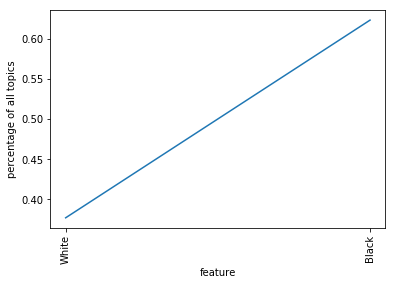

In [16]:
plt.plot(all_features,P_feature)
plt.xlabel('feature')
plt.ylabel('percentage of all topics')
plt.xticks(rotation=90);

In [17]:
# now compute PMI

all_features.index('Black')

1

In [27]:
df_by_feature.values

array([[  8.41587813,   4.95994701,   5.95994701,   3.79082815,
          7.22589926,  19.42542923,   3.27211154,   4.92918604,
          3.33218097,  22.60019141,  16.64924179,   3.06109393,
          9.93101347,  14.35642832,  17.88714919,   6.98171865,
         11.5285033 ,   3.24415198,   5.50297276,  14.91286185,
         16.11960555,   2.5110387 ,  41.06078249,  12.57859741,
          8.12470868,  10.77437267,  14.59474545,   9.63648084,
         11.87547836,  26.95004691,   4.30083581,  12.98746266,
         21.12930233,   6.51931312,   7.52187892,  10.96150909,
          2.68786538,   9.11781076,   4.86765441,  28.24497533,
         71.10009069,  10.39024759,  27.78597634,   8.47290104,
          1.33658351,  18.59425043,  16.92354896,  14.35083901,
          3.33425039,   3.77594719,   3.07235317,  17.78754643,
          8.84681342,  13.8664932 ,  11.80976451,  25.22651943,
          4.57582689,   5.79382241,   3.23373919,   4.15733868,
          5.35919367,   3.42905108,  22.

In [18]:
idx_Test = all_features.index('Black')

df_by_feature.values[idx_Test,:]

array([1591.59987  , 2091.676563 , 1602.830814 , 1268.985906 ,
       1841.558538 , 2455.337549 , 1279.931142 , 1657.579087 ,
       1074.519078 , 1664.08938  , 1963.238915 , 1047.946946 ,
       2086.775813 , 1991.130826 , 1896.353917 , 2145.886681 ,
       2097.892885 , 1222.821815 , 1211.229275 , 1583.934688 ,
       1792.226105 , 1216.754047 , 1582.844984 , 1728.990891 ,
       2052.971635 , 1767.869387 , 1872.687141 , 1546.520288 ,
       1533.964473 , 2316.611342 , 1445.230041 , 1639.555305 ,
       1077.824305 , 1388.396127 , 1217.599082 , 1681.992613 ,
       4233.985674 , 2147.611201 , 1709.620151 , 1750.239652 ,
       1101.39046  , 2140.935597 , 1675.511855 , 1267.459089 ,
        844.9782943, 1672.992263 , 1973.102403 , 1986.128035 ,
       2028.44712  , 1857.387997 , 1220.36714  , 2303.287605 ,
       1644.04131  , 2277.112394 , 2155.461354 , 1505.934484 ,
       1612.676307 , 1539.827508 , 4205.963565 , 1237.983726 ,
       1928.534617 , 1389.295543 , 2126.618653 , 2411.2

In [19]:
df_by_feature.values.sum()

281898.00002870004

In [20]:
idx_Test = all_features.index('Black')
pmi_Test = np.log(df_by_feature.values[idx_Test,:]/df_by_feature.values.sum()) - np.log(P_base) - np.log(P_feature[idx_Test])



In [21]:
pmi_Test

array([ 0.05993238,  0.13278948,  0.0588251 ,  0.0883084 ,  0.08530745,
        0.04323092,  0.08859667,  0.08866847, -0.08679693, -0.30202167,
        0.01817767,  0.07468933,  0.02297035, -0.09152268, -0.08452914,
        0.02997775,  0.0554081 ,  0.06680292,  0.05676426,  0.09728783,
       -0.02976844,  0.11010531, -0.41448756, -0.24210027,  0.0178276 ,
       -0.03156369,  0.1508167 ,  0.03852719, -0.00124833, -0.10343599,
        0.10055307,  0.05111443, -0.808742  , -0.0018396 ,  0.05045015,
       -0.06294875,  0.3488052 ,  0.10803401,  0.10426136, -0.18637082,
       -0.29409935,  0.0511945 , -0.01523558,  0.06452351, -0.68258109,
       -0.01754135,  0.04914066,  0.07167068,  0.08053459,  0.10345533,
        0.0546388 , -0.04837406,  0.08612919,  0.02219539, -0.00632868,
       -0.50384938,  0.13362   ,  0.10342513,  0.31836339, -0.05867595,
        0.05468521,  0.05757267, -0.1415393 ,  0.04285805, -0.11882036,
        0.10835654,  0.10734248, -0.02662811,  0.1738258 , -0.30

In [22]:
print(pmi_Test.argsort()[::-1]) # topics ranked highest pmi to lowest
print(sorted(pmi_Test)[::-1]) # their scores

[36 58 78 68 26 91 82 80 56  1 79 21 65 37 66 38 49 57 30 19 76  7  6  3
 52 81  4 48 11 85 47 99 17 43 97 96  0  2 87 61 70 18 16 98 60 50 88 94
 72 41 31 34 73 46  5 63 27 15 93 89 12 53 10 24 83 28 33 54 42 45 67 20
 25 51 75 59 77 35 14 90  8 13 95 29 64 62 84 74 39 71 23 86 40  9 69 22
 55 44 32 92]
[0.3488051993763215, 0.31836339193493957, 0.299410272723833, 0.17382579913817264, 0.15081670080325282, 0.15037129734517696, 0.1387586012962061, 0.13821268163104095, 0.13362000119088902, 0.1327894833949952, 0.12502190421904769, 0.11010530584347422, 0.10835653518018806, 0.10803401418313219, 0.1073424827692746, 0.1042613641751704, 0.10345532844455207, 0.10342512553162231, 0.10055306707187683, 0.09728782990997975, 0.09654519093706893, 0.08866846557716834, 0.08859667380760983, 0.08830839703118287, 0.0861291933087609, 0.08611585410383626, 0.08530745291970843, 0.08053459261334805, 0.07468933385099441, 0.07318463516920226, 0.0716706841558461, 0.067601098807476, 0.06680291876544531, 0.064523511

In [23]:
def get_pmi_by_feature(df_by_feature,P_base,P_feature,feature):
    idx = list(df_by_feature.index).index(feature)
    
    pmi = np.log(df_by_feature.values[idx,:]/df_by_feature.values.sum()) - np.log(P_base) - np.log(P_feature[idx])
    return pmi

get_pmi_by_feature(df_by_feature,P_base,P_feature,'Black')
    

array([ 0.05993238,  0.13278948,  0.0588251 ,  0.0883084 ,  0.08530745,
        0.04323092,  0.08859667,  0.08866847, -0.08679693, -0.30202167,
        0.01817767,  0.07468933,  0.02297035, -0.09152268, -0.08452914,
        0.02997775,  0.0554081 ,  0.06680292,  0.05676426,  0.09728783,
       -0.02976844,  0.11010531, -0.41448756, -0.24210027,  0.0178276 ,
       -0.03156369,  0.1508167 ,  0.03852719, -0.00124833, -0.10343599,
        0.10055307,  0.05111443, -0.808742  , -0.0018396 ,  0.05045015,
       -0.06294875,  0.3488052 ,  0.10803401,  0.10426136, -0.18637082,
       -0.29409935,  0.0511945 , -0.01523558,  0.06452351, -0.68258109,
       -0.01754135,  0.04914066,  0.07167068,  0.08053459,  0.10345533,
        0.0546388 , -0.04837406,  0.08612919,  0.02219539, -0.00632868,
       -0.50384938,  0.13362   ,  0.10342513,  0.31836339, -0.05867595,
        0.05468521,  0.05757267, -0.1415393 ,  0.04285805, -0.11882036,
        0.10835654,  0.10734248, -0.02662811,  0.1738258 , -0.30

In [24]:
for feature in list(df_by_feature.index):
    pmi = get_pmi_by_feature(df_by_feature,P_base,P_feature,feature)
    
    print("===", feature, "===")
    print(pmi.argsort()[::-1][:10]) # topics ranked highest pmi to lowest
    print(sorted(pmi)[::-1][:10]) # their scores
 

=== White ===
[92 32 44 55 22 69  9 40 86 23]
[0.695332757659046, 0.6506847468392445, 0.5976467135358774, 0.503407467082124, 0.44531186393096234, 0.36351747191484995, 0.3583464478710219, 0.3515294530698607, 0.3108349082593722, 0.3041572972867479]
=== Black ===
[36 58 78 68 26 91 82 80 56  1]
[0.3488051993763215, 0.31836339193493957, 0.299410272723833, 0.17382579913817264, 0.15081670080325282, 0.15037129734517696, 0.1387586012962061, 0.13821268163104095, 0.13362000119088902, 0.1327894833949952]


In [25]:
# print same thing to file
fout = open("race-pmi.txt","w")

for feature in list(df_by_feature.index):
    pmi = get_pmi_by_feature(df_by_feature,P_base,P_feature,feature)
    
    print("===", feature, "===", file=fout)
    print(pmi.argsort()[::-1][:10], file=fout) # topics ranked highest pmi to lowest
    print(sorted(pmi)[::-1][:10], file=fout) # their scores
    
fout.close()
    

In [ ]:
# now do cosine similarity on all combos of papers -- to here

np.zeros(X_all_years.shape[0]-1)

for i,X_year in enumerate(X_all_years[:-1,]):
    corr[i] = X_year.dot(X_all_years[i+1,]) / ((np.linalg.norm(X_year)) * (np.linalg.norm(X_all_years[i+1,])))

